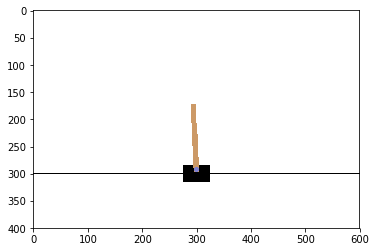

In [1]:
import gym
import numpy as np
import seaborn as sns
from gym import logger
import matplotlib.pyplot as plt
%matplotlib inline
logger.set_level(logger.ERROR)

env = gym.make('CartPole-v1')
env.reset()
plt.imshow(env.render(mode='rgb_array'))
env.close()

In [2]:
from src.rl.RandomAgent import RandomAgent
from src.rl.util import run_episode

env = gym.make('CartPole-v1')
agent = RandomAgent()
run_episode(env, agent, render=True)
dist = [run_episode(env, agent) for _ in range(1000)]



  0%|          | 0/1000 [00:00<?, ?it/s]

 22%|██▏       | 218/1000 [00:00<00:00, 2173.71it/s]

 36%|███▌      | 359/1000 [00:00<00:00, 1789.60it/s]

 59%|█████▊    | 587/1000 [00:00<00:00, 1951.75it/s]

 80%|████████  | 805/1000 [00:00<00:00, 2005.08it/s]

100%|██████████| 1000/1000 [00:00<00:00, 2039.33it/s]


/home/ralars/.local/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


Trained for  1000  episodes. Last episode achieved a reward of  68.0


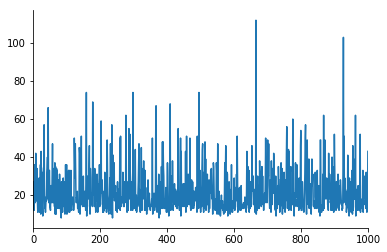

In [3]:
from src.rl.TabularQAgent import TabularQAgent
from tqdm import tqdm

agent = TabularQAgent(0.1, 0.5, 0.99)


def run_experiment(env, agent, epsilon_decay, n_episodes) -> list:
    rewards = []
    for i in tqdm(range(n_episodes)):
        sum_r = run_episode(env, agent, learn=True)
        rewards.append(sum_r)
        agent.epsilon *= epsilon_decay
    agent.epsilon = 0
    sum_r = run_episode(env, agent)
    print('Trained for ', n_episodes, ' episodes. Last episode achieved a reward of ', sum_r)     
    #env.render(mode='path', ss=ss)
    return rewards


#run_episode(env, agent, learn=True)
rewards = run_experiment(env, agent, 0.99, 1000)
sns.tsplot(rewards)
sns.despine()

Compare random histogram to histogram of training - does it look different? How come?

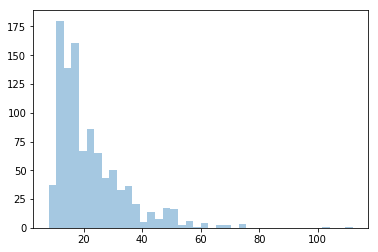

In [4]:
sns.distplot(rewards, kde=False)

/home/ralars/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 2/1000 [00:00<02:03,  8.11it/s]

  1%|          | 6/1000 [00:00<01:03, 15.67it/s]

  1%|          | 9/1000 [00:00<00:54, 18.12it/s]

  1%|▏         | 13/1000 [00:00<00:46, 21.06it/s]

  2%|▏         | 17/1000 [00:00<00:43, 22.84it/s]

  2%|▏         | 22/1000 [00:00<00:37, 25.75it/s]

  3%|▎         | 26/1000 [00:00<00:37, 26.32it/s]

  3%|▎         | 30/1000 [00:01<00:36, 26.42it/s]

  4%|▎         | 35/1000 [00:01<00:34, 27.99it/s]

  4%|▍         | 39/1000 [00:01<00:33, 28.46it/s]

  4%|▍         | 43/1000 [00:01<00:34, 27.61it/s]

  5%|▍         | 46/1000 [00:01<00:36, 26.35it/s]

  5%|▌         | 50/1000 [00:01<00:35, 26.84it/s]

  5%|▌         | 53/1000 [00:02<00:37, 25.58it/s]

  6%|▌         | 57/1000 [00:02<00:35, 26.23it/s]

  6%|▌         | 61/1000 [00:02<00:34, 26.83it/s]

  7%|▋         | 66/1000 [00:02<00:34, 27.29it/s]

  7%|▋         | 70/1000 [00:02<00:34, 27.09it/s]

  7%|▋         | 74/1000 [00:02<00:33, 27.53it/s]

  8%|▊         | 78/1000 [00:02<00:33, 27.91it/s]

  8%|▊         | 82/1000 [00:02<00:33, 27.48it/s]

  9%|▊         | 87/1000 [00:03<00:32, 27.84it/s]

  9%|▉         | 91/1000 [00:03<00:32, 28.12it/s]

 10%|▉         | 95/1000 [00:03<00:32, 27.64it/s]

 10%|▉         | 98/1000 [00:03<00:34, 26.30it/s]

 10%|█         | 101/1000 [00:03<00:34, 25.81it/s]

 10%|█         | 104/1000 [00:04<00:35, 25.45it/s]

 11%|█         | 107/1000 [00:04<00:37, 23.89it/s]

 11%|█         | 109/1000 [00:04<00:38, 23.05it/s]

 11%|█         | 111/1000 [00:04<00:39, 22.28it/s]

 11%|█▏        | 113/1000 [00:05<00:41, 21.39it/s]

 12%|█▏        | 115/1000 [00:05<00:41, 21.20it/s]

 12%|█▏        | 117/1000 [00:05<00:42, 20.62it/s]

 12%|█▏        | 119/1000 [00:05<00:43, 20.08it/s]

 12%|█▏        | 121/1000 [00:06<00:44, 19.74it/s]

 12%|█▏        | 122/1000 [00:06<00:45, 19.35it/s]

 12%|█▏        | 123/1000 [00:06<00:46, 18.86it/s]

 12%|█▏        | 124/1000 [00:06<00:48, 18.13it/s]

 12%|█▎        | 125/1000 [00:07<00:49, 17.55it/s]

 13%|█▎        | 126/1000 [00:07<00:51, 17.08it/s]

 13%|█▎        | 128/1000 [00:07<00:53, 16.38it/s]

 13%|█▎        | 129/1000 [00:08<00:54, 16.07it/s]

 13%|█▎        | 130/1000 [00:08<00:54, 15.86it/s]

 13%|█▎        | 131/1000 [00:08<00:55, 15.62it/s]

 13%|█▎        | 132/1000 [00:08<00:56, 15.50it/s]

 13%|█▎        | 133/1000 [00:08<00:56, 15.26it/s]

 13%|█▎        | 134/1000 [00:09<00:58, 14.77it/s]

 14%|█▎        | 135/1000 [00:09<01:00, 14.35it/s]

 14%|█▎        | 136/1000 [00:09<01:02, 13.72it/s]

 14%|█▍        | 138/1000 [00:10<01:02, 13.78it/s]

 14%|█▍        | 139/1000 [00:10<01:03, 13.45it/s]

 14%|█▍        | 140/1000 [00:10<01:04, 13.30it/s]

 14%|█▍        | 141/1000 [00:10<01:06, 12.89it/s]

 14%|█▍        | 142/1000 [00:11<01:07, 12.70it/s]

 14%|█▍        | 144/1000 [00:11<01:08, 12.41it/s]

 14%|█▍        | 145/1000 [00:11<01:10, 12.10it/s]

 15%|█▍        | 146/1000 [00:12<01:11, 11.91it/s]

 15%|█▍        | 147/1000 [00:12<01:13, 11.58it/s]

 15%|█▍        | 149/1000 [00:13<01:15, 11.30it/s]

 15%|█▌        | 150/1000 [00:13<01:17, 10.90it/s]

 15%|█▌        | 151/1000 [00:14<01:19, 10.67it/s]

 15%|█▌        | 152/1000 [00:14<01:21, 10.37it/s]

 15%|█▌        | 153/1000 [00:14<01:22, 10.21it/s]

 15%|█▌        | 154/1000 [00:15<01:23, 10.13it/s]

 16%|█▌        | 155/1000 [00:15<01:24,  9.98it/s]

 16%|█▌        | 156/1000 [00:16<01:26,  9.73it/s]

 16%|█▌        | 157/1000 [00:16<01:27,  9.65it/s]

 16%|█▌        | 159/1000 [00:16<01:28,  9.47it/s]

 16%|█▌        | 160/1000 [00:17<01:30,  9.26it/s]

 16%|█▌        | 161/1000 [00:17<01:32,  9.03it/s]

 16%|█▌        | 162/1000 [00:18<01:34,  8.88it/s]

 16%|█▋        | 164/1000 [00:18<01:34,  8.82it/s]

 16%|█▋        | 165/1000 [00:19<01:36,  8.66it/s]

 17%|█▋        | 167/1000 [00:19<01:37,  8.50it/s]

 17%|█▋        | 168/1000 [00:19<01:38,  8.45it/s]

 17%|█▋        | 169/1000 [00:20<01:40,  8.27it/s]

 17%|█▋        | 170/1000 [00:20<01:40,  8.22it/s]

 17%|█▋        | 171/1000 [00:20<01:41,  8.16it/s]

 17%|█▋        | 173/1000 [00:21<01:41,  8.19it/s]

 17%|█▋        | 174/1000 [00:21<01:40,  8.19it/s]

 18%|█▊        | 175/1000 [00:21<01:41,  8.11it/s]

 18%|█▊        | 176/1000 [00:22<01:43,  7.98it/s]

 18%|█▊        | 177/1000 [00:22<01:43,  7.97it/s]

 18%|█▊        | 178/1000 [00:22<01:45,  7.81it/s]

 18%|█▊        | 179/1000 [00:23<01:45,  7.77it/s]

 18%|█▊        | 180/1000 [00:23<01:48,  7.55it/s]

 18%|█▊        | 181/1000 [00:24<01:49,  7.49it/s]

 18%|█▊        | 182/1000 [00:24<01:50,  7.39it/s]

 18%|█▊        | 183/1000 [00:25<01:52,  7.27it/s]

 18%|█▊        | 184/1000 [00:25<01:53,  7.17it/s]

 18%|█▊        | 185/1000 [00:25<01:53,  7.15it/s]

 19%|█▊        | 186/1000 [00:26<01:54,  7.11it/s]

 19%|█▊        | 187/1000 [00:26<01:55,  7.05it/s]

 19%|█▉        | 188/1000 [00:27<01:56,  6.94it/s]

 19%|█▉        | 189/1000 [00:27<01:58,  6.86it/s]

 19%|█▉        | 190/1000 [00:28<01:59,  6.77it/s]

 19%|█▉        | 191/1000 [00:28<02:00,  6.69it/s]

 19%|█▉        | 192/1000 [00:29<02:02,  6.62it/s]

 19%|█▉        | 193/1000 [00:29<02:02,  6.59it/s]

 19%|█▉        | 194/1000 [00:29<02:03,  6.54it/s]

 20%|█▉        | 195/1000 [00:30<02:05,  6.43it/s]

 20%|█▉        | 196/1000 [00:30<02:06,  6.35it/s]

 20%|█▉        | 197/1000 [00:31<02:07,  6.29it/s]

 20%|█▉        | 198/1000 [00:31<02:08,  6.22it/s]

 20%|█▉        | 199/1000 [00:32<02:10,  6.14it/s]

 20%|██        | 201/1000 [00:32<02:10,  6.12it/s]

 20%|██        | 202/1000 [00:33<02:12,  6.02it/s]

 20%|██        | 203/1000 [00:33<02:13,  5.98it/s]

 20%|██        | 204/1000 [00:34<02:14,  5.94it/s]

 20%|██        | 205/1000 [00:34<02:14,  5.89it/s]

 21%|██        | 207/1000 [00:35<02:15,  5.85it/s]

 21%|██        | 208/1000 [00:35<02:16,  5.80it/s]

 21%|██        | 209/1000 [00:36<02:17,  5.75it/s]

 21%|██        | 210/1000 [00:36<02:18,  5.70it/s]

 21%|██        | 211/1000 [00:37<02:19,  5.66it/s]

 21%|██        | 212/1000 [00:37<02:21,  5.59it/s]

 21%|██▏       | 213/1000 [00:38<02:21,  5.55it/s]

 21%|██▏       | 214/1000 [00:38<02:22,  5.50it/s]

 22%|██▏       | 215/1000 [00:39<02:24,  5.44it/s]

 22%|██▏       | 217/1000 [00:40<02:24,  5.41it/s]

 22%|██▏       | 218/1000 [00:40<02:26,  5.34it/s]

 22%|██▏       | 219/1000 [00:41<02:27,  5.29it/s]

 22%|██▏       | 220/1000 [00:42<02:29,  5.23it/s]

 22%|██▏       | 221/1000 [00:42<02:30,  5.18it/s]

 22%|██▏       | 222/1000 [00:43<02:31,  5.14it/s]

 22%|██▏       | 223/1000 [00:43<02:33,  5.07it/s]

 22%|██▏       | 224/1000 [00:44<02:34,  5.04it/s]

 22%|██▎       | 225/1000 [00:45<02:35,  4.99it/s]

 23%|██▎       | 226/1000 [00:45<02:36,  4.96it/s]

 23%|██▎       | 227/1000 [00:46<02:36,  4.92it/s]

 23%|██▎       | 228/1000 [00:47<02:39,  4.85it/s]

 23%|██▎       | 229/1000 [00:47<02:41,  4.78it/s]

 23%|██▎       | 230/1000 [00:48<02:42,  4.73it/s]

 23%|██▎       | 231/1000 [00:48<02:42,  4.73it/s]

 23%|██▎       | 232/1000 [00:49<02:43,  4.71it/s]

 23%|██▎       | 233/1000 [00:49<02:44,  4.66it/s]

 23%|██▎       | 234/1000 [00:50<02:44,  4.66it/s]

 24%|██▎       | 235/1000 [00:50<02:45,  4.62it/s]

 24%|██▎       | 236/1000 [00:51<02:46,  4.58it/s]

 24%|██▎       | 237/1000 [00:52<02:47,  4.55it/s]

 24%|██▍       | 238/1000 [00:52<02:48,  4.52it/s]

 24%|██▍       | 239/1000 [00:53<02:49,  4.48it/s]

 24%|██▍       | 240/1000 [00:53<02:50,  4.45it/s]

 24%|██▍       | 241/1000 [00:54<02:51,  4.43it/s]

 24%|██▍       | 242/1000 [00:55<02:53,  4.37it/s]

 24%|██▍       | 243/1000 [00:56<02:54,  4.33it/s]

 24%|██▍       | 244/1000 [00:56<02:54,  4.34it/s]

 24%|██▍       | 245/1000 [00:56<02:55,  4.30it/s]

 25%|██▍       | 246/1000 [00:57<02:56,  4.27it/s]

 25%|██▍       | 247/1000 [00:58<02:57,  4.23it/s]

 25%|██▍       | 248/1000 [00:59<02:59,  4.19it/s]

 25%|██▍       | 249/1000 [01:00<03:01,  4.15it/s]

 25%|██▌       | 250/1000 [01:00<03:01,  4.12it/s]

 25%|██▌       | 251/1000 [01:01<03:02,  4.09it/s]

 25%|██▌       | 252/1000 [01:01<03:03,  4.08it/s]

 25%|██▌       | 253/1000 [01:02<03:04,  4.04it/s]

 25%|██▌       | 254/1000 [01:03<03:06,  4.00it/s]

 26%|██▌       | 255/1000 [01:04<03:07,  3.96it/s]

 26%|██▌       | 256/1000 [01:05<03:09,  3.93it/s]

 26%|██▌       | 257/1000 [01:06<03:10,  3.89it/s]

 26%|██▌       | 258/1000 [01:06<03:11,  3.87it/s]

 26%|██▌       | 259/1000 [01:07<03:12,  3.85it/s]

 26%|██▌       | 260/1000 [01:08<03:13,  3.82it/s]

 26%|██▌       | 261/1000 [01:09<03:15,  3.78it/s]

 26%|██▌       | 262/1000 [01:09<03:17,  3.75it/s]

 26%|██▋       | 263/1000 [01:10<03:17,  3.74it/s]

 26%|██▋       | 264/1000 [01:11<03:18,  3.71it/s]

 26%|██▋       | 265/1000 [01:12<03:19,  3.68it/s]

 27%|██▋       | 266/1000 [01:12<03:20,  3.65it/s]

 27%|██▋       | 267/1000 [01:13<03:21,  3.63it/s]

 27%|██▋       | 268/1000 [01:14<03:23,  3.60it/s]

 27%|██▋       | 269/1000 [01:15<03:24,  3.57it/s]

 27%|██▋       | 270/1000 [01:15<03:24,  3.57it/s]

 27%|██▋       | 271/1000 [01:16<03:25,  3.55it/s]

 27%|██▋       | 272/1000 [01:17<03:27,  3.52it/s]

 27%|██▋       | 273/1000 [01:17<03:27,  3.50it/s]

 27%|██▋       | 274/1000 [01:18<03:27,  3.50it/s]

 28%|██▊       | 275/1000 [01:19<03:28,  3.48it/s]

 28%|██▊       | 276/1000 [01:19<03:29,  3.46it/s]

 28%|██▊       | 277/1000 [01:20<03:30,  3.44it/s]

 28%|██▊       | 278/1000 [01:21<03:30,  3.43it/s]

 28%|██▊       | 279/1000 [01:21<03:31,  3.41it/s]

 28%|██▊       | 280/1000 [01:22<03:32,  3.39it/s]

 28%|██▊       | 281/1000 [01:23<03:33,  3.37it/s]

 28%|██▊       | 282/1000 [01:24<03:34,  3.34it/s]

 28%|██▊       | 283/1000 [01:25<03:36,  3.32it/s]

 28%|██▊       | 284/1000 [01:25<03:36,  3.31it/s]

 28%|██▊       | 285/1000 [01:26<03:37,  3.29it/s]

 29%|██▊       | 286/1000 [01:27<03:38,  3.27it/s]

 29%|██▊       | 287/1000 [01:28<03:39,  3.25it/s]

 29%|██▉       | 288/1000 [01:29<03:40,  3.23it/s]

 29%|██▉       | 289/1000 [01:29<03:41,  3.21it/s]

 29%|██▉       | 290/1000 [01:30<03:42,  3.19it/s]

 29%|██▉       | 291/1000 [01:31<03:43,  3.18it/s]

 29%|██▉       | 292/1000 [01:32<03:44,  3.15it/s]

 29%|██▉       | 293/1000 [01:33<03:45,  3.14it/s]

 29%|██▉       | 294/1000 [01:33<03:45,  3.13it/s]

 30%|██▉       | 295/1000 [01:34<03:46,  3.11it/s]

 30%|██▉       | 296/1000 [01:35<03:47,  3.09it/s]

 30%|██▉       | 297/1000 [01:36<03:48,  3.07it/s]

 30%|██▉       | 298/1000 [01:37<03:49,  3.05it/s]

 30%|██▉       | 299/1000 [01:38<03:50,  3.04it/s]

 30%|███       | 300/1000 [01:39<03:51,  3.03it/s]

 30%|███       | 301/1000 [01:39<03:52,  3.01it/s]

 30%|███       | 302/1000 [01:40<03:53,  2.99it/s]

 30%|███       | 303/1000 [01:41<03:54,  2.98it/s]

 30%|███       | 304/1000 [01:42<03:54,  2.96it/s]

 30%|███       | 305/1000 [01:43<03:55,  2.95it/s]

 31%|███       | 306/1000 [01:44<03:56,  2.94it/s]

 31%|███       | 307/1000 [01:44<03:56,  2.93it/s]

 31%|███       | 308/1000 [01:45<03:57,  2.91it/s]

 31%|███       | 309/1000 [01:46<03:58,  2.90it/s]

 31%|███       | 310/1000 [01:47<03:59,  2.88it/s]

 31%|███       | 311/1000 [01:48<04:00,  2.87it/s]

 31%|███       | 312/1000 [01:49<04:00,  2.86it/s]

 31%|███▏      | 313/1000 [01:49<04:00,  2.85it/s]

 31%|███▏      | 314/1000 [01:50<04:01,  2.84it/s]

 32%|███▏      | 315/1000 [01:51<04:02,  2.83it/s]

 32%|███▏      | 316/1000 [01:52<04:02,  2.81it/s]

 32%|███▏      | 317/1000 [01:53<04:03,  2.80it/s]

 32%|███▏      | 318/1000 [01:53<04:04,  2.79it/s]

 32%|███▏      | 319/1000 [01:54<04:03,  2.80it/s]

 32%|███▏      | 320/1000 [01:54<04:04,  2.79it/s]

 32%|███▏      | 321/1000 [01:55<04:04,  2.78it/s]

 32%|███▏      | 322/1000 [01:56<04:04,  2.77it/s]

 32%|███▏      | 323/1000 [01:56<04:05,  2.76it/s]

 32%|███▏      | 324/1000 [01:57<04:05,  2.75it/s]

 32%|███▎      | 325/1000 [01:58<04:05,  2.74it/s]

 33%|███▎      | 326/1000 [01:59<04:06,  2.74it/s]

 33%|███▎      | 327/1000 [01:59<04:06,  2.73it/s]

 33%|███▎      | 328/1000 [01:59<04:05,  2.74it/s]

 33%|███▎      | 329/1000 [02:00<04:05,  2.73it/s]

 33%|███▎      | 330/1000 [02:01<04:05,  2.72it/s]

 33%|███▎      | 331/1000 [02:01<04:06,  2.72it/s]

 33%|███▎      | 332/1000 [02:02<04:06,  2.71it/s]

 33%|███▎      | 333/1000 [02:03<04:06,  2.71it/s]

 33%|███▎      | 334/1000 [02:03<04:06,  2.70it/s]

 34%|███▎      | 335/1000 [02:04<04:06,  2.70it/s]

 34%|███▎      | 336/1000 [02:04<04:06,  2.69it/s]

 34%|███▎      | 337/1000 [02:05<04:06,  2.69it/s]

 34%|███▍      | 338/1000 [02:06<04:06,  2.68it/s]

 34%|███▍      | 339/1000 [02:06<04:06,  2.68it/s]

 34%|███▍      | 340/1000 [02:07<04:06,  2.67it/s]

 34%|███▍      | 341/1000 [02:07<04:06,  2.67it/s]

 34%|███▍      | 342/1000 [02:08<04:07,  2.66it/s]

 34%|███▍      | 343/1000 [02:09<04:07,  2.66it/s]

 34%|███▍      | 344/1000 [02:09<04:07,  2.65it/s]

 34%|███▍      | 345/1000 [02:10<04:07,  2.65it/s]

 35%|███▍      | 346/1000 [02:10<04:07,  2.64it/s]

 35%|███▍      | 347/1000 [02:11<04:07,  2.64it/s]

 35%|███▍      | 348/1000 [02:12<04:07,  2.63it/s]

 35%|███▍      | 349/1000 [02:12<04:07,  2.63it/s]

 35%|███▌      | 350/1000 [02:13<04:07,  2.62it/s]

 35%|███▌      | 351/1000 [02:14<04:08,  2.62it/s]

 35%|███▌      | 352/1000 [02:14<04:08,  2.61it/s]

 35%|███▌      | 353/1000 [02:15<04:08,  2.61it/s]

 35%|███▌      | 354/1000 [02:16<04:08,  2.60it/s]

 36%|███▌      | 355/1000 [02:16<04:08,  2.59it/s]

 36%|███▌      | 356/1000 [02:17<04:08,  2.59it/s]

 36%|███▌      | 357/1000 [02:18<04:09,  2.58it/s]

 36%|███▌      | 358/1000 [02:18<04:09,  2.58it/s]

 36%|███▌      | 359/1000 [02:19<04:08,  2.58it/s]

 36%|███▌      | 360/1000 [02:19<04:08,  2.57it/s]

 36%|███▌      | 361/1000 [02:20<04:08,  2.57it/s]

 36%|███▌      | 362/1000 [02:21<04:08,  2.56it/s]

 36%|███▋      | 363/1000 [02:21<04:08,  2.56it/s]

 36%|███▋      | 364/1000 [02:22<04:09,  2.55it/s]

 36%|███▋      | 365/1000 [02:23<04:09,  2.55it/s]

 37%|███▋      | 367/1000 [02:23<04:08,  2.55it/s]

 37%|███▋      | 368/1000 [02:24<04:08,  2.54it/s]

 37%|███▋      | 369/1000 [02:25<04:08,  2.54it/s]

 37%|███▋      | 370/1000 [02:25<04:08,  2.53it/s]

 37%|███▋      | 371/1000 [02:26<04:08,  2.53it/s]

 37%|███▋      | 372/1000 [02:27<04:08,  2.53it/s]

 37%|███▋      | 373/1000 [02:27<04:08,  2.52it/s]

 37%|███▋      | 374/1000 [02:28<04:08,  2.52it/s]

 38%|███▊      | 375/1000 [02:29<04:09,  2.51it/s]

 38%|███▊      | 376/1000 [02:30<04:09,  2.50it/s]

 38%|███▊      | 377/1000 [02:30<04:09,  2.50it/s]

 38%|███▊      | 378/1000 [02:31<04:09,  2.49it/s]

 38%|███▊      | 379/1000 [02:32<04:09,  2.49it/s]

 38%|███▊      | 380/1000 [02:32<04:09,  2.49it/s]

 38%|███▊      | 381/1000 [02:33<04:09,  2.48it/s]

 38%|███▊      | 382/1000 [02:34<04:09,  2.48it/s]

 38%|███▊      | 383/1000 [02:34<04:09,  2.47it/s]

 38%|███▊      | 384/1000 [02:35<04:09,  2.47it/s]

 38%|███▊      | 385/1000 [02:36<04:09,  2.46it/s]

 39%|███▊      | 386/1000 [02:37<04:10,  2.45it/s]

 39%|███▊      | 387/1000 [02:38<04:10,  2.45it/s]

 39%|███▉      | 388/1000 [02:38<04:10,  2.44it/s]

 39%|███▉      | 389/1000 [02:39<04:10,  2.44it/s]

 39%|███▉      | 390/1000 [02:40<04:10,  2.43it/s]

 39%|███▉      | 391/1000 [02:41<04:10,  2.43it/s]

 39%|███▉      | 392/1000 [02:41<04:11,  2.42it/s]

 39%|███▉      | 393/1000 [02:42<04:11,  2.42it/s]

 39%|███▉      | 394/1000 [02:43<04:11,  2.41it/s]

 40%|███▉      | 395/1000 [02:44<04:11,  2.40it/s]

 40%|███▉      | 396/1000 [02:44<04:11,  2.40it/s]

 40%|███▉      | 397/1000 [02:45<04:11,  2.40it/s]

 40%|███▉      | 398/1000 [02:46<04:11,  2.39it/s]

 40%|███▉      | 399/1000 [02:47<04:11,  2.39it/s]

 40%|████      | 400/1000 [02:47<04:11,  2.38it/s]

 40%|████      | 401/1000 [02:48<04:12,  2.38it/s]

 40%|████      | 402/1000 [02:49<04:12,  2.37it/s]

 40%|████      | 403/1000 [02:50<04:12,  2.37it/s]

 40%|████      | 404/1000 [02:50<04:12,  2.36it/s]

 40%|████      | 405/1000 [02:51<04:12,  2.36it/s]

 41%|████      | 406/1000 [02:52<04:12,  2.35it/s]

 41%|████      | 407/1000 [02:53<04:12,  2.35it/s]

 41%|████      | 408/1000 [02:54<04:12,  2.34it/s]

 41%|████      | 409/1000 [02:54<04:12,  2.34it/s]

 41%|████      | 410/1000 [02:55<04:12,  2.33it/s]

 41%|████      | 411/1000 [02:56<04:12,  2.33it/s]

 41%|████      | 412/1000 [02:57<04:12,  2.32it/s]

 41%|████▏     | 413/1000 [02:57<04:12,  2.32it/s]

 41%|████▏     | 414/1000 [02:58<04:13,  2.32it/s]

 42%|████▏     | 415/1000 [02:59<04:12,  2.31it/s]

 42%|████▏     | 416/1000 [03:00<04:13,  2.31it/s]

 42%|████▏     | 417/1000 [03:01<04:13,  2.30it/s]

 42%|████▏     | 418/1000 [03:01<04:13,  2.30it/s]

 42%|████▏     | 419/1000 [03:02<04:13,  2.29it/s]

 42%|████▏     | 420/1000 [03:03<04:13,  2.29it/s]

 42%|████▏     | 421/1000 [03:04<04:13,  2.28it/s]

 42%|████▏     | 422/1000 [03:05<04:14,  2.27it/s]

 42%|████▏     | 423/1000 [03:06<04:14,  2.27it/s]

 42%|████▏     | 424/1000 [03:07<04:14,  2.26it/s]

 42%|████▎     | 425/1000 [03:08<04:15,  2.25it/s]

 43%|████▎     | 426/1000 [03:09<04:15,  2.25it/s]

 43%|████▎     | 427/1000 [03:10<04:15,  2.24it/s]

 43%|████▎     | 428/1000 [03:11<04:15,  2.24it/s]

 43%|████▎     | 429/1000 [03:12<04:16,  2.23it/s]

 43%|████▎     | 430/1000 [03:13<04:16,  2.22it/s]

 43%|████▎     | 431/1000 [03:14<04:16,  2.22it/s]

 43%|████▎     | 432/1000 [03:15<04:16,  2.21it/s]

 43%|████▎     | 433/1000 [03:16<04:16,  2.21it/s]

 43%|████▎     | 434/1000 [03:17<04:17,  2.20it/s]

 44%|████▎     | 435/1000 [03:18<04:17,  2.20it/s]

 44%|████▎     | 436/1000 [03:18<04:17,  2.19it/s]

 44%|████▎     | 437/1000 [03:20<04:17,  2.18it/s]

 44%|████▍     | 438/1000 [03:21<04:17,  2.18it/s]

 44%|████▍     | 439/1000 [03:21<04:18,  2.17it/s]

 44%|████▍     | 440/1000 [03:22<04:18,  2.17it/s]

 44%|████▍     | 441/1000 [03:23<04:18,  2.16it/s]

 44%|████▍     | 442/1000 [03:24<04:18,  2.16it/s]

 44%|████▍     | 443/1000 [03:25<04:18,  2.15it/s]

 44%|████▍     | 444/1000 [03:26<04:18,  2.15it/s]

 44%|████▍     | 445/1000 [03:27<04:19,  2.14it/s]

 45%|████▍     | 446/1000 [03:28<04:19,  2.14it/s]

 45%|████▍     | 447/1000 [03:29<04:19,  2.14it/s]

 45%|████▍     | 448/1000 [03:30<04:18,  2.13it/s]

 45%|████▍     | 449/1000 [03:30<04:18,  2.13it/s]

 45%|████▌     | 450/1000 [03:31<04:18,  2.12it/s]

 45%|████▌     | 451/1000 [03:32<04:19,  2.12it/s]

 45%|████▌     | 452/1000 [03:33<04:19,  2.11it/s]

 45%|████▌     | 453/1000 [03:34<04:19,  2.11it/s]

 45%|████▌     | 454/1000 [03:35<04:19,  2.11it/s]

 46%|████▌     | 455/1000 [03:36<04:18,  2.10it/s]

 46%|████▌     | 456/1000 [03:36<04:18,  2.10it/s]

 46%|████▌     | 457/1000 [03:37<04:18,  2.10it/s]

 46%|████▌     | 458/1000 [03:38<04:18,  2.09it/s]

 46%|████▌     | 459/1000 [03:39<04:18,  2.09it/s]

 46%|████▌     | 460/1000 [03:40<04:18,  2.09it/s]

 46%|████▌     | 461/1000 [03:41<04:18,  2.08it/s]

 46%|████▌     | 462/1000 [03:42<04:19,  2.08it/s]

 46%|████▋     | 463/1000 [03:43<04:19,  2.07it/s]

 46%|████▋     | 464/1000 [03:44<04:19,  2.07it/s]

 46%|████▋     | 465/1000 [03:45<04:19,  2.06it/s]

 47%|████▋     | 466/1000 [03:46<04:19,  2.06it/s]

 47%|████▋     | 467/1000 [03:47<04:19,  2.06it/s]

 47%|████▋     | 468/1000 [03:48<04:19,  2.05it/s]

 47%|████▋     | 469/1000 [03:49<04:19,  2.05it/s]

 47%|████▋     | 470/1000 [03:50<04:19,  2.04it/s]

 47%|████▋     | 471/1000 [03:50<04:18,  2.04it/s]

 47%|████▋     | 473/1000 [03:51<04:17,  2.04it/s]

 47%|████▋     | 474/1000 [03:52<04:17,  2.04it/s]

 48%|████▊     | 475/1000 [03:53<04:17,  2.04it/s]

 48%|████▊     | 476/1000 [03:54<04:17,  2.03it/s]

 48%|████▊     | 477/1000 [03:55<04:17,  2.03it/s]

 48%|████▊     | 478/1000 [03:56<04:17,  2.03it/s]

 48%|████▊     | 479/1000 [03:56<04:17,  2.02it/s]

 48%|████▊     | 480/1000 [03:57<04:17,  2.02it/s]

 48%|████▊     | 481/1000 [03:58<04:16,  2.02it/s]

 48%|████▊     | 482/1000 [03:58<04:16,  2.02it/s]

 48%|████▊     | 483/1000 [03:59<04:16,  2.02it/s]

 48%|████▊     | 484/1000 [04:00<04:16,  2.02it/s]

 48%|████▊     | 485/1000 [04:00<04:15,  2.01it/s]

 49%|████▊     | 486/1000 [04:01<04:15,  2.01it/s]

 49%|████▊     | 487/1000 [04:02<04:15,  2.01it/s]

 49%|████▉     | 488/1000 [04:03<04:15,  2.00it/s]

 49%|████▉     | 489/1000 [04:04<04:15,  2.00it/s]

 49%|████▉     | 490/1000 [04:05<04:15,  2.00it/s]

 49%|████▉     | 491/1000 [04:06<04:15,  1.99it/s]

 49%|████▉     | 492/1000 [04:07<04:15,  1.99it/s]

 49%|████▉     | 493/1000 [04:08<04:15,  1.98it/s]

 49%|████▉     | 494/1000 [04:09<04:15,  1.98it/s]

 50%|████▉     | 495/1000 [04:10<04:15,  1.98it/s]

 50%|████▉     | 496/1000 [04:11<04:15,  1.97it/s]

 50%|████▉     | 497/1000 [04:12<04:15,  1.97it/s]

 50%|████▉     | 498/1000 [04:13<04:15,  1.97it/s]

 50%|████▉     | 499/1000 [04:14<04:15,  1.96it/s]

 50%|█████     | 500/1000 [04:15<04:15,  1.96it/s]

 50%|█████     | 501/1000 [04:16<04:14,  1.96it/s]

 50%|█████     | 502/1000 [04:16<04:14,  1.95it/s]

 50%|█████     | 503/1000 [04:17<04:14,  1.95it/s]

 50%|█████     | 504/1000 [04:18<04:14,  1.95it/s]

 50%|█████     | 505/1000 [04:19<04:14,  1.94it/s]

 51%|█████     | 506/1000 [04:20<04:14,  1.94it/s]

 51%|█████     | 507/1000 [04:21<04:14,  1.94it/s]

 51%|█████     | 508/1000 [04:22<04:14,  1.93it/s]

 51%|█████     | 509/1000 [04:23<04:14,  1.93it/s]

 51%|█████     | 510/1000 [04:24<04:14,  1.93it/s]

 51%|█████     | 511/1000 [04:25<04:14,  1.92it/s]

 51%|█████     | 512/1000 [04:26<04:13,  1.92it/s]

 51%|█████▏    | 513/1000 [04:27<04:13,  1.92it/s]

 51%|█████▏    | 514/1000 [04:28<04:13,  1.92it/s]

 52%|█████▏    | 515/1000 [04:29<04:13,  1.91it/s]

 52%|█████▏    | 516/1000 [04:30<04:13,  1.91it/s]

 52%|█████▏    | 517/1000 [04:31<04:13,  1.91it/s]

 52%|█████▏    | 518/1000 [04:32<04:13,  1.90it/s]

 52%|█████▏    | 519/1000 [04:33<04:13,  1.90it/s]

 52%|█████▏    | 520/1000 [04:34<04:12,  1.90it/s]

 52%|█████▏    | 521/1000 [04:34<04:12,  1.89it/s]

 52%|█████▏    | 522/1000 [04:35<04:12,  1.89it/s]

 52%|█████▏    | 523/1000 [04:36<04:12,  1.89it/s]

 52%|█████▏    | 524/1000 [04:37<04:12,  1.89it/s]

 52%|█████▎    | 525/1000 [04:38<04:12,  1.88it/s]

 53%|█████▎    | 526/1000 [04:39<04:12,  1.88it/s]

 53%|█████▎    | 527/1000 [04:40<04:11,  1.88it/s]

 53%|█████▎    | 528/1000 [04:41<04:11,  1.87it/s]

 53%|█████▎    | 529/1000 [04:42<04:11,  1.87it/s]

 53%|█████▎    | 530/1000 [04:43<04:11,  1.87it/s]

 53%|█████▎    | 531/1000 [04:44<04:11,  1.87it/s]

 53%|█████▎    | 532/1000 [04:45<04:11,  1.86it/s]

 53%|█████▎    | 533/1000 [04:46<04:10,  1.86it/s]

 53%|█████▎    | 534/1000 [04:47<04:10,  1.86it/s]

 54%|█████▎    | 535/1000 [04:48<04:10,  1.86it/s]

 54%|█████▎    | 536/1000 [04:49<04:10,  1.85it/s]

 54%|█████▎    | 537/1000 [04:50<04:10,  1.85it/s]

 54%|█████▍    | 538/1000 [04:51<04:10,  1.85it/s]

 54%|█████▍    | 539/1000 [04:52<04:09,  1.85it/s]

 54%|█████▍    | 540/1000 [04:53<04:09,  1.84it/s]

 54%|█████▍    | 541/1000 [04:54<04:09,  1.84it/s]

 54%|█████▍    | 542/1000 [04:54<04:09,  1.84it/s]

 54%|█████▍    | 543/1000 [04:55<04:09,  1.84it/s]

 54%|█████▍    | 544/1000 [04:56<04:08,  1.83it/s]

 55%|█████▍    | 545/1000 [04:57<04:08,  1.83it/s]

 55%|█████▍    | 546/1000 [04:58<04:08,  1.83it/s]

 55%|█████▍    | 547/1000 [04:59<04:07,  1.83it/s]

 55%|█████▍    | 548/1000 [05:00<04:07,  1.83it/s]

 55%|█████▍    | 549/1000 [05:00<04:07,  1.82it/s]

 55%|█████▌    | 550/1000 [05:01<04:06,  1.82it/s]

 55%|█████▌    | 551/1000 [05:02<04:06,  1.82it/s]

 55%|█████▌    | 552/1000 [05:03<04:06,  1.82it/s]

 55%|█████▌    | 553/1000 [05:03<04:05,  1.82it/s]

 55%|█████▌    | 554/1000 [05:04<04:05,  1.82it/s]

 56%|█████▌    | 555/1000 [05:05<04:04,  1.82it/s]

 56%|█████▌    | 556/1000 [05:06<04:04,  1.82it/s]

 56%|█████▌    | 557/1000 [05:06<04:04,  1.82it/s]

 56%|█████▌    | 558/1000 [05:07<04:03,  1.81it/s]

 56%|█████▌    | 559/1000 [05:08<04:03,  1.81it/s]

 56%|█████▌    | 560/1000 [05:09<04:02,  1.81it/s]

 56%|█████▌    | 561/1000 [05:09<04:02,  1.81it/s]

 56%|█████▌    | 562/1000 [05:10<04:02,  1.81it/s]

 56%|█████▋    | 563/1000 [05:11<04:01,  1.81it/s]

 56%|█████▋    | 564/1000 [05:11<04:01,  1.81it/s]

 56%|█████▋    | 565/1000 [05:12<04:00,  1.81it/s]

 57%|█████▋    | 566/1000 [05:13<04:00,  1.81it/s]

 57%|█████▋    | 567/1000 [05:13<03:59,  1.81it/s]

 57%|█████▋    | 568/1000 [05:14<03:59,  1.81it/s]

 57%|█████▋    | 569/1000 [05:15<03:58,  1.81it/s]

 57%|█████▋    | 570/1000 [05:15<03:58,  1.81it/s]

 57%|█████▋    | 571/1000 [05:16<03:57,  1.80it/s]

 57%|█████▋    | 572/1000 [05:17<03:57,  1.80it/s]

 57%|█████▋    | 573/1000 [05:17<03:56,  1.80it/s]

 57%|█████▋    | 574/1000 [05:18<03:56,  1.80it/s]

 57%|█████▊    | 575/1000 [05:19<03:55,  1.80it/s]

 58%|█████▊    | 576/1000 [05:19<03:55,  1.80it/s]

 58%|█████▊    | 577/1000 [05:20<03:54,  1.80it/s]

 58%|█████▊    | 578/1000 [05:21<03:54,  1.80it/s]

 58%|█████▊    | 579/1000 [05:21<03:53,  1.80it/s]

 58%|█████▊    | 580/1000 [05:22<03:53,  1.80it/s]

 58%|█████▊    | 581/1000 [05:22<03:52,  1.80it/s]

 58%|█████▊    | 582/1000 [05:23<03:52,  1.80it/s]

 58%|█████▊    | 583/1000 [05:24<03:51,  1.80it/s]

 58%|█████▊    | 584/1000 [05:24<03:51,  1.80it/s]

 58%|█████▊    | 585/1000 [05:25<03:50,  1.80it/s]

 59%|█████▊    | 586/1000 [05:25<03:50,  1.80it/s]

 59%|█████▊    | 587/1000 [05:26<03:49,  1.80it/s]

 59%|█████▉    | 588/1000 [05:27<03:49,  1.80it/s]

 59%|█████▉    | 589/1000 [05:28<03:48,  1.80it/s]

 59%|█████▉    | 590/1000 [05:28<03:48,  1.80it/s]

 59%|█████▉    | 591/1000 [05:29<03:47,  1.79it/s]

 59%|█████▉    | 592/1000 [05:29<03:47,  1.79it/s]

 59%|█████▉    | 593/1000 [05:30<03:46,  1.79it/s]

 59%|█████▉    | 594/1000 [05:31<03:46,  1.79it/s]

 60%|█████▉    | 595/1000 [05:31<03:45,  1.79it/s]

 60%|█████▉    | 596/1000 [05:32<03:45,  1.79it/s]

 60%|█████▉    | 597/1000 [05:33<03:45,  1.79it/s]

 60%|█████▉    | 598/1000 [05:34<03:44,  1.79it/s]

 60%|█████▉    | 599/1000 [05:35<03:44,  1.79it/s]

 60%|██████    | 600/1000 [05:35<03:43,  1.79it/s]

 60%|██████    | 601/1000 [05:36<03:43,  1.78it/s]

 60%|██████    | 602/1000 [05:37<03:43,  1.78it/s]

 60%|██████    | 603/1000 [05:38<03:42,  1.78it/s]

 60%|██████    | 604/1000 [05:39<03:42,  1.78it/s]

 60%|██████    | 605/1000 [05:40<03:41,  1.78it/s]

 61%|██████    | 606/1000 [05:40<03:41,  1.78it/s]

 61%|██████    | 607/1000 [05:41<03:41,  1.78it/s]

 61%|██████    | 608/1000 [05:42<03:41,  1.77it/s]

 61%|██████    | 609/1000 [05:43<03:40,  1.77it/s]

 61%|██████    | 610/1000 [05:44<03:40,  1.77it/s]

 61%|██████    | 611/1000 [05:45<03:40,  1.77it/s]

 61%|██████    | 612/1000 [05:46<03:39,  1.77it/s]

 61%|██████▏   | 613/1000 [05:47<03:39,  1.77it/s]

 61%|██████▏   | 614/1000 [05:47<03:38,  1.76it/s]

 62%|██████▏   | 615/1000 [05:48<03:38,  1.76it/s]

 62%|██████▏   | 616/1000 [05:49<03:37,  1.76it/s]

 62%|██████▏   | 617/1000 [05:50<03:37,  1.76it/s]

 62%|██████▏   | 618/1000 [05:50<03:36,  1.76it/s]

 62%|██████▏   | 619/1000 [05:51<03:36,  1.76it/s]

 62%|██████▏   | 620/1000 [05:52<03:36,  1.76it/s]

 62%|██████▏   | 621/1000 [05:53<03:35,  1.76it/s]

 62%|██████▏   | 624/1000 [05:54<03:33,  1.76it/s]

 62%|██████▎   | 625/1000 [05:54<03:32,  1.76it/s]

 63%|██████▎   | 627/1000 [05:55<03:31,  1.76it/s]

 63%|██████▎   | 628/1000 [05:56<03:31,  1.76it/s]

 63%|██████▎   | 631/1000 [05:56<03:28,  1.77it/s]

 64%|██████▎   | 637/1000 [05:57<03:23,  1.78it/s]

 64%|██████▍   | 640/1000 [05:58<03:21,  1.79it/s]

 64%|██████▍   | 642/1000 [05:59<03:20,  1.79it/s]

 64%|██████▍   | 644/1000 [06:00<03:19,  1.79it/s]

 64%|██████▍   | 645/1000 [06:00<03:18,  1.79it/s]

 65%|██████▍   | 646/1000 [06:01<03:17,  1.79it/s]

 65%|██████▍   | 647/1000 [06:01<03:17,  1.79it/s]

 65%|██████▍   | 648/1000 [06:02<03:16,  1.79it/s]

 65%|██████▍   | 649/1000 [06:03<03:16,  1.79it/s]

 65%|██████▌   | 650/1000 [06:03<03:15,  1.79it/s]

 65%|██████▌   | 651/1000 [06:04<03:15,  1.79it/s]

 65%|██████▌   | 652/1000 [06:05<03:15,  1.78it/s]

 65%|██████▌   | 653/1000 [06:06<03:14,  1.78it/s]

 65%|██████▌   | 654/1000 [06:07<03:14,  1.78it/s]

 66%|██████▌   | 655/1000 [06:07<03:13,  1.78it/s]

 66%|██████▌   | 656/1000 [06:08<03:13,  1.78it/s]

 66%|██████▌   | 657/1000 [06:09<03:12,  1.78it/s]

 66%|██████▌   | 658/1000 [06:10<03:12,  1.78it/s]

 66%|██████▌   | 659/1000 [06:10<03:11,  1.78it/s]

 66%|██████▌   | 660/1000 [06:11<03:11,  1.78it/s]

 66%|██████▌   | 661/1000 [06:12<03:10,  1.78it/s]

 66%|██████▌   | 662/1000 [06:13<03:10,  1.77it/s]

 66%|██████▋   | 663/1000 [06:13<03:09,  1.77it/s]

 66%|██████▋   | 664/1000 [06:14<03:09,  1.77it/s]

 66%|██████▋   | 665/1000 [06:15<03:08,  1.77it/s]

 67%|██████▋   | 666/1000 [06:15<03:08,  1.77it/s]

 67%|██████▋   | 667/1000 [06:16<03:08,  1.77it/s]

 67%|██████▋   | 668/1000 [06:17<03:07,  1.77it/s]

 67%|██████▋   | 669/1000 [06:18<03:07,  1.77it/s]

 67%|██████▋   | 670/1000 [06:18<03:06,  1.77it/s]

 67%|██████▋   | 671/1000 [06:19<03:06,  1.77it/s]

 67%|██████▋   | 672/1000 [06:20<03:05,  1.77it/s]

 67%|██████▋   | 673/1000 [06:21<03:05,  1.77it/s]

 67%|██████▋   | 674/1000 [06:22<03:04,  1.76it/s]

 68%|██████▊   | 675/1000 [06:22<03:04,  1.76it/s]

 68%|██████▊   | 676/1000 [06:23<03:03,  1.76it/s]

 68%|██████▊   | 677/1000 [06:24<03:03,  1.76it/s]

 68%|██████▊   | 678/1000 [06:25<03:03,  1.76it/s]

 68%|██████▊   | 679/1000 [06:26<03:02,  1.76it/s]

 68%|██████▊   | 680/1000 [06:26<03:02,  1.76it/s]

 68%|██████▊   | 681/1000 [06:27<03:01,  1.76it/s]

 68%|██████▊   | 682/1000 [06:28<03:01,  1.75it/s]

 68%|██████▊   | 683/1000 [06:29<03:00,  1.75it/s]

 68%|██████▊   | 684/1000 [06:30<03:00,  1.75it/s]

 68%|██████▊   | 685/1000 [06:31<02:59,  1.75it/s]

 69%|██████▊   | 686/1000 [06:32<02:59,  1.75it/s]

 69%|██████▊   | 687/1000 [06:33<02:59,  1.75it/s]

 69%|██████▉   | 688/1000 [06:34<02:58,  1.74it/s]

 69%|██████▉   | 689/1000 [06:35<02:58,  1.74it/s]

 69%|██████▉   | 690/1000 [06:36<02:57,  1.74it/s]

 69%|██████▉   | 691/1000 [06:37<02:57,  1.74it/s]

 69%|██████▉   | 692/1000 [06:37<02:57,  1.74it/s]

 69%|██████▉   | 693/1000 [06:38<02:56,  1.74it/s]

 69%|██████▉   | 694/1000 [06:39<02:56,  1.74it/s]

 70%|██████▉   | 695/1000 [06:40<02:55,  1.73it/s]

 70%|██████▉   | 696/1000 [06:41<02:55,  1.73it/s]

 70%|██████▉   | 697/1000 [06:42<02:55,  1.73it/s]

 70%|██████▉   | 698/1000 [06:43<02:54,  1.73it/s]

 70%|██████▉   | 699/1000 [06:44<02:54,  1.73it/s]

 70%|███████   | 700/1000 [06:45<02:53,  1.73it/s]

 70%|███████   | 701/1000 [06:46<02:53,  1.72it/s]

 70%|███████   | 702/1000 [06:47<02:52,  1.72it/s]

 70%|███████   | 703/1000 [06:48<02:52,  1.72it/s]

 70%|███████   | 704/1000 [06:49<02:52,  1.72it/s]

 70%|███████   | 705/1000 [06:50<02:51,  1.72it/s]

 71%|███████   | 706/1000 [06:51<02:51,  1.72it/s]

 71%|███████   | 707/1000 [06:52<02:50,  1.71it/s]

 71%|███████   | 708/1000 [06:53<02:50,  1.71it/s]

 71%|███████   | 709/1000 [06:54<02:50,  1.71it/s]

 71%|███████   | 710/1000 [06:55<02:49,  1.71it/s]

 71%|███████   | 711/1000 [06:56<02:49,  1.71it/s]

 71%|███████   | 712/1000 [06:57<02:48,  1.71it/s]

 71%|███████▏  | 713/1000 [06:58<02:48,  1.70it/s]

 71%|███████▏  | 714/1000 [06:59<02:48,  1.70it/s]

 72%|███████▏  | 715/1000 [07:00<02:47,  1.70it/s]

 72%|███████▏  | 716/1000 [07:01<02:47,  1.70it/s]

 72%|███████▏  | 717/1000 [07:02<02:46,  1.70it/s]

 72%|███████▏  | 718/1000 [07:03<02:46,  1.70it/s]

 72%|███████▏  | 719/1000 [07:04<02:45,  1.69it/s]

 72%|███████▏  | 720/1000 [07:05<02:45,  1.69it/s]

 72%|███████▏  | 721/1000 [07:06<02:45,  1.69it/s]

 72%|███████▏  | 722/1000 [07:07<02:44,  1.69it/s]

 72%|███████▏  | 723/1000 [07:08<02:44,  1.69it/s]

 72%|███████▏  | 724/1000 [07:09<02:43,  1.69it/s]

 72%|███████▎  | 725/1000 [07:10<02:43,  1.69it/s]

 73%|███████▎  | 726/1000 [07:11<02:42,  1.68it/s]

 73%|███████▎  | 727/1000 [07:12<02:42,  1.68it/s]

 73%|███████▎  | 728/1000 [07:13<02:41,  1.68it/s]

 73%|███████▎  | 729/1000 [07:14<02:41,  1.68it/s]

 73%|███████▎  | 730/1000 [07:15<02:40,  1.68it/s]

 73%|███████▎  | 731/1000 [07:16<02:40,  1.68it/s]

 73%|███████▎  | 732/1000 [07:17<02:40,  1.67it/s]

 73%|███████▎  | 733/1000 [07:18<02:39,  1.67it/s]

 73%|███████▎  | 734/1000 [07:19<02:39,  1.67it/s]

 74%|███████▎  | 735/1000 [07:20<02:38,  1.67it/s]

 74%|███████▎  | 736/1000 [07:20<02:38,  1.67it/s]

 74%|███████▎  | 737/1000 [07:21<02:37,  1.67it/s]

 74%|███████▍  | 738/1000 [07:22<02:37,  1.67it/s]

 74%|███████▍  | 739/1000 [07:23<02:36,  1.66it/s]

 74%|███████▍  | 740/1000 [07:24<02:36,  1.66it/s]

 74%|███████▍  | 741/1000 [07:25<02:35,  1.66it/s]

 74%|███████▍  | 742/1000 [07:26<02:35,  1.66it/s]

 74%|███████▍  | 743/1000 [07:27<02:34,  1.66it/s]

 74%|███████▍  | 744/1000 [07:28<02:34,  1.66it/s]

 74%|███████▍  | 745/1000 [07:29<02:33,  1.66it/s]

 75%|███████▍  | 746/1000 [07:30<02:33,  1.65it/s]

 75%|███████▍  | 747/1000 [07:31<02:33,  1.65it/s]

 75%|███████▍  | 748/1000 [07:32<02:32,  1.65it/s]

 75%|███████▍  | 749/1000 [07:33<02:32,  1.65it/s]

 75%|███████▌  | 750/1000 [07:34<02:31,  1.65it/s]

 75%|███████▌  | 751/1000 [07:35<02:31,  1.65it/s]

 75%|███████▌  | 752/1000 [07:36<02:30,  1.65it/s]

 75%|███████▌  | 753/1000 [07:37<02:30,  1.64it/s]

 75%|███████▌  | 754/1000 [07:38<02:29,  1.64it/s]

 76%|███████▌  | 755/1000 [07:39<02:29,  1.64it/s]

 76%|███████▌  | 756/1000 [07:40<02:28,  1.64it/s]

 76%|███████▌  | 757/1000 [07:41<02:28,  1.64it/s]

 76%|███████▌  | 758/1000 [07:42<02:27,  1.64it/s]

 76%|███████▌  | 759/1000 [07:43<02:27,  1.64it/s]

 76%|███████▌  | 760/1000 [07:44<02:26,  1.64it/s]

 76%|███████▌  | 761/1000 [07:45<02:26,  1.63it/s]

 76%|███████▌  | 762/1000 [07:46<02:25,  1.63it/s]

 76%|███████▋  | 763/1000 [07:47<02:25,  1.63it/s]

 76%|███████▋  | 764/1000 [07:48<02:24,  1.63it/s]

 76%|███████▋  | 765/1000 [07:49<02:24,  1.63it/s]

 77%|███████▋  | 766/1000 [07:50<02:23,  1.63it/s]

 77%|███████▋  | 767/1000 [07:51<02:23,  1.63it/s]

 77%|███████▋  | 768/1000 [07:52<02:22,  1.63it/s]

 77%|███████▋  | 769/1000 [07:53<02:22,  1.62it/s]

 77%|███████▋  | 770/1000 [07:54<02:21,  1.62it/s]

 77%|███████▋  | 771/1000 [07:54<02:20,  1.62it/s]

 77%|███████▋  | 772/1000 [07:55<02:20,  1.62it/s]

 77%|███████▋  | 773/1000 [07:56<02:19,  1.62it/s]

 77%|███████▋  | 774/1000 [07:57<02:19,  1.62it/s]

 78%|███████▊  | 775/1000 [07:58<02:18,  1.62it/s]

 78%|███████▊  | 776/1000 [07:59<02:18,  1.62it/s]

 78%|███████▊  | 777/1000 [08:00<02:17,  1.62it/s]

 78%|███████▊  | 778/1000 [08:01<02:17,  1.62it/s]

 78%|███████▊  | 779/1000 [08:01<02:16,  1.62it/s]

 78%|███████▊  | 780/1000 [08:02<02:16,  1.62it/s]

 78%|███████▊  | 781/1000 [08:03<02:15,  1.61it/s]

 78%|███████▊  | 782/1000 [08:04<02:15,  1.61it/s]

 78%|███████▊  | 783/1000 [08:05<02:14,  1.61it/s]

 78%|███████▊  | 784/1000 [08:06<02:13,  1.61it/s]

 78%|███████▊  | 785/1000 [08:06<02:13,  1.61it/s]

 79%|███████▊  | 786/1000 [08:07<02:12,  1.61it/s]

 79%|███████▊  | 787/1000 [08:08<02:12,  1.61it/s]

 79%|███████▉  | 788/1000 [08:09<02:11,  1.61it/s]

 79%|███████▉  | 789/1000 [08:10<02:11,  1.61it/s]

 79%|███████▉  | 790/1000 [08:10<02:10,  1.61it/s]

 79%|███████▉  | 791/1000 [08:11<02:09,  1.61it/s]

 79%|███████▉  | 792/1000 [08:12<02:09,  1.61it/s]

 79%|███████▉  | 793/1000 [08:12<02:08,  1.61it/s]

 79%|███████▉  | 794/1000 [08:13<02:08,  1.61it/s]

 80%|███████▉  | 795/1000 [08:14<02:07,  1.61it/s]

 80%|███████▉  | 796/1000 [08:15<02:06,  1.61it/s]

 80%|███████▉  | 797/1000 [08:16<02:06,  1.61it/s]

 80%|███████▉  | 798/1000 [08:16<02:05,  1.61it/s]

 80%|███████▉  | 799/1000 [08:17<02:05,  1.61it/s]

 80%|████████  | 800/1000 [08:18<02:04,  1.60it/s]

 80%|████████  | 801/1000 [08:19<02:04,  1.60it/s]

 80%|████████  | 802/1000 [08:20<02:03,  1.60it/s]

 80%|████████  | 803/1000 [08:20<02:02,  1.60it/s]

 80%|████████  | 804/1000 [08:21<02:02,  1.60it/s]

 80%|████████  | 805/1000 [08:21<02:01,  1.60it/s]

 81%|████████  | 806/1000 [08:22<02:01,  1.60it/s]

 81%|████████  | 807/1000 [08:23<02:00,  1.60it/s]

 81%|████████  | 808/1000 [08:24<01:59,  1.60it/s]

 81%|████████  | 809/1000 [08:25<01:59,  1.60it/s]

 81%|████████  | 810/1000 [08:26<01:58,  1.60it/s]

 81%|████████  | 811/1000 [08:27<01:58,  1.60it/s]

 81%|████████  | 812/1000 [08:28<01:57,  1.60it/s]

 81%|████████▏ | 813/1000 [08:29<01:57,  1.60it/s]

 81%|████████▏ | 814/1000 [08:30<01:56,  1.60it/s]

 82%|████████▏ | 815/1000 [08:31<01:56,  1.59it/s]

 82%|████████▏ | 816/1000 [08:32<01:55,  1.59it/s]

 82%|████████▏ | 817/1000 [08:33<01:54,  1.59it/s]

 82%|████████▏ | 818/1000 [08:34<01:54,  1.59it/s]

 82%|████████▏ | 819/1000 [08:34<01:53,  1.59it/s]

 82%|████████▏ | 820/1000 [08:35<01:53,  1.59it/s]

 82%|████████▏ | 821/1000 [08:36<01:52,  1.59it/s]

 82%|████████▏ | 822/1000 [08:37<01:52,  1.59it/s]

 82%|████████▏ | 823/1000 [08:38<01:51,  1.59it/s]

 82%|████████▏ | 824/1000 [08:39<01:51,  1.59it/s]

 82%|████████▎ | 825/1000 [08:40<01:50,  1.58it/s]

 83%|████████▎ | 826/1000 [08:41<01:49,  1.58it/s]

 83%|████████▎ | 827/1000 [08:42<01:49,  1.58it/s]

 83%|████████▎ | 828/1000 [08:43<01:48,  1.58it/s]

 83%|████████▎ | 829/1000 [08:44<01:48,  1.58it/s]

 83%|████████▎ | 830/1000 [08:45<01:47,  1.58it/s]

 83%|████████▎ | 831/1000 [08:46<01:47,  1.58it/s]

 83%|████████▎ | 832/1000 [08:47<01:46,  1.58it/s]

 83%|████████▎ | 833/1000 [08:48<01:45,  1.58it/s]

 83%|████████▎ | 834/1000 [08:48<01:45,  1.58it/s]

 84%|████████▎ | 837/1000 [08:48<01:42,  1.58it/s]

 84%|████████▍ | 843/1000 [08:49<01:38,  1.59it/s]

 85%|████████▍ | 849/1000 [08:49<01:34,  1.60it/s]

 86%|████████▌ | 855/1000 [08:50<01:29,  1.61it/s]

 86%|████████▌ | 858/1000 [08:50<01:27,  1.62it/s]

 86%|████████▌ | 860/1000 [08:51<01:26,  1.62it/s]

 86%|████████▌ | 862/1000 [08:51<01:25,  1.62it/s]

 87%|████████▋ | 866/1000 [08:51<01:22,  1.63it/s]

 87%|████████▋ | 868/1000 [08:51<01:20,  1.63it/s]

 87%|████████▋ | 870/1000 [08:52<01:19,  1.63it/s]

 87%|████████▋ | 872/1000 [08:52<01:18,  1.64it/s]

 87%|████████▋ | 873/1000 [08:53<01:17,  1.64it/s]

 87%|████████▋ | 874/1000 [08:53<01:16,  1.64it/s]

 88%|████████▊ | 875/1000 [08:53<01:16,  1.64it/s]

 88%|████████▊ | 876/1000 [08:53<01:15,  1.64it/s]

 88%|████████▊ | 877/1000 [08:54<01:14,  1.64it/s]

 88%|████████▊ | 878/1000 [08:54<01:14,  1.64it/s]

 88%|████████▊ | 879/1000 [08:54<01:13,  1.64it/s]

 88%|████████▊ | 880/1000 [08:54<01:12,  1.65it/s]

 88%|████████▊ | 881/1000 [08:55<01:12,  1.65it/s]

 88%|████████▊ | 882/1000 [08:55<01:11,  1.65it/s]

 88%|████████▊ | 883/1000 [08:55<01:11,  1.65it/s]

 88%|████████▊ | 884/1000 [08:56<01:10,  1.65it/s]

 88%|████████▊ | 885/1000 [08:56<01:09,  1.65it/s]

 89%|████████▊ | 886/1000 [08:57<01:09,  1.65it/s]

 89%|████████▊ | 887/1000 [08:57<01:08,  1.65it/s]

 89%|████████▉ | 888/1000 [08:58<01:07,  1.65it/s]

 89%|████████▉ | 889/1000 [08:58<01:07,  1.65it/s]

 89%|████████▉ | 890/1000 [08:58<01:06,  1.65it/s]

 89%|████████▉ | 891/1000 [08:59<01:05,  1.65it/s]

 89%|████████▉ | 892/1000 [08:59<01:05,  1.65it/s]

 89%|████████▉ | 893/1000 [09:00<01:04,  1.65it/s]

 89%|████████▉ | 894/1000 [09:00<01:04,  1.65it/s]

 90%|████████▉ | 895/1000 [09:01<01:03,  1.65it/s]

 90%|████████▉ | 896/1000 [09:01<01:02,  1.65it/s]

 90%|████████▉ | 897/1000 [09:02<01:02,  1.65it/s]

 90%|████████▉ | 898/1000 [09:02<01:01,  1.65it/s]

 90%|████████▉ | 899/1000 [09:03<01:01,  1.66it/s]

 90%|█████████ | 900/1000 [09:03<01:00,  1.66it/s]

 90%|█████████ | 901/1000 [09:03<00:59,  1.66it/s]

 90%|█████████ | 902/1000 [09:04<00:59,  1.66it/s]

 90%|█████████ | 903/1000 [09:04<00:58,  1.66it/s]

 90%|█████████ | 904/1000 [09:05<00:57,  1.66it/s]

 90%|█████████ | 905/1000 [09:05<00:57,  1.66it/s]

 91%|█████████ | 906/1000 [09:05<00:56,  1.66it/s]

 91%|█████████ | 907/1000 [09:06<00:56,  1.66it/s]

 91%|█████████ | 908/1000 [09:06<00:55,  1.66it/s]

 91%|█████████ | 909/1000 [09:07<00:54,  1.66it/s]

 91%|█████████ | 910/1000 [09:07<00:54,  1.66it/s]

 91%|█████████ | 911/1000 [09:07<00:53,  1.66it/s]

 91%|█████████ | 912/1000 [09:08<00:52,  1.66it/s]

 91%|█████████▏| 913/1000 [09:08<00:52,  1.66it/s]

 91%|█████████▏| 914/1000 [09:09<00:51,  1.66it/s]

 92%|█████████▏| 915/1000 [09:09<00:51,  1.67it/s]

 92%|█████████▏| 916/1000 [09:09<00:50,  1.67it/s]

 92%|█████████▏| 917/1000 [09:10<00:49,  1.67it/s]

 92%|█████████▏| 918/1000 [09:10<00:49,  1.67it/s]

 92%|█████████▏| 919/1000 [09:10<00:48,  1.67it/s]

 92%|█████████▏| 920/1000 [09:11<00:47,  1.67it/s]

 92%|█████████▏| 921/1000 [09:11<00:47,  1.67it/s]

 92%|█████████▏| 922/1000 [09:12<00:46,  1.67it/s]

 92%|█████████▏| 923/1000 [09:12<00:46,  1.67it/s]

 92%|█████████▏| 924/1000 [09:12<00:45,  1.67it/s]

 92%|█████████▎| 925/1000 [09:13<00:44,  1.67it/s]

 93%|█████████▎| 926/1000 [09:13<00:44,  1.67it/s]

 93%|█████████▎| 927/1000 [09:13<00:43,  1.67it/s]

 93%|█████████▎| 928/1000 [09:14<00:43,  1.67it/s]

 93%|█████████▎| 929/1000 [09:14<00:42,  1.67it/s]

 93%|█████████▎| 930/1000 [09:15<00:41,  1.68it/s]

 93%|█████████▎| 931/1000 [09:15<00:41,  1.68it/s]

 93%|█████████▎| 932/1000 [09:15<00:40,  1.68it/s]

 93%|█████████▎| 933/1000 [09:16<00:39,  1.68it/s]

 93%|█████████▎| 934/1000 [09:16<00:39,  1.68it/s]

 94%|█████████▎| 935/1000 [09:17<00:38,  1.68it/s]

 94%|█████████▎| 936/1000 [09:17<00:38,  1.68it/s]

 94%|█████████▎| 937/1000 [09:17<00:37,  1.68it/s]

 94%|█████████▍| 938/1000 [09:18<00:36,  1.68it/s]

 94%|█████████▍| 939/1000 [09:18<00:36,  1.68it/s]

 94%|█████████▍| 940/1000 [09:19<00:35,  1.68it/s]

 94%|█████████▍| 941/1000 [09:19<00:35,  1.68it/s]

 94%|█████████▍| 942/1000 [09:19<00:34,  1.68it/s]

 94%|█████████▍| 943/1000 [09:20<00:33,  1.68it/s]

 94%|█████████▍| 944/1000 [09:20<00:33,  1.68it/s]

 94%|█████████▍| 945/1000 [09:21<00:32,  1.68it/s]

 95%|█████████▍| 946/1000 [09:21<00:32,  1.68it/s]

 95%|█████████▍| 947/1000 [09:21<00:31,  1.69it/s]

 95%|█████████▍| 948/1000 [09:22<00:30,  1.69it/s]

 95%|█████████▍| 949/1000 [09:22<00:30,  1.69it/s]

 95%|█████████▌| 950/1000 [09:23<00:29,  1.69it/s]

 95%|█████████▌| 951/1000 [09:23<00:29,  1.69it/s]

 95%|█████████▌| 952/1000 [09:23<00:28,  1.69it/s]

 95%|█████████▌| 953/1000 [09:24<00:27,  1.69it/s]

 95%|█████████▌| 954/1000 [09:24<00:27,  1.69it/s]

 96%|█████████▌| 955/1000 [09:25<00:26,  1.69it/s]

 96%|█████████▌| 956/1000 [09:25<00:26,  1.69it/s]

 96%|█████████▌| 957/1000 [09:25<00:25,  1.69it/s]

 96%|█████████▌| 958/1000 [09:26<00:24,  1.69it/s]

 96%|█████████▌| 959/1000 [09:26<00:24,  1.69it/s]

 96%|█████████▌| 960/1000 [09:27<00:23,  1.69it/s]

 96%|█████████▌| 961/1000 [09:27<00:23,  1.69it/s]

 96%|█████████▌| 962/1000 [09:27<00:22,  1.69it/s]

 96%|█████████▋| 963/1000 [09:28<00:21,  1.69it/s]

 96%|█████████▋| 964/1000 [09:28<00:21,  1.70it/s]

 96%|█████████▋| 965/1000 [09:29<00:20,  1.70it/s]

 97%|█████████▋| 966/1000 [09:29<00:20,  1.70it/s]

 97%|█████████▋| 967/1000 [09:29<00:19,  1.70it/s]

 97%|█████████▋| 968/1000 [09:30<00:18,  1.70it/s]

 97%|█████████▋| 969/1000 [09:30<00:18,  1.70it/s]

 97%|█████████▋| 970/1000 [09:31<00:17,  1.70it/s]

 97%|█████████▋| 971/1000 [09:31<00:17,  1.70it/s]

 97%|█████████▋| 972/1000 [09:31<00:16,  1.70it/s]

 97%|█████████▋| 973/1000 [09:32<00:15,  1.70it/s]

 97%|█████████▋| 974/1000 [09:32<00:15,  1.70it/s]

 98%|█████████▊| 975/1000 [09:33<00:14,  1.70it/s]

 98%|█████████▊| 976/1000 [09:33<00:14,  1.70it/s]

 98%|█████████▊| 977/1000 [09:34<00:13,  1.70it/s]

 98%|█████████▊| 978/1000 [09:34<00:12,  1.70it/s]

 98%|█████████▊| 979/1000 [09:35<00:12,  1.70it/s]

 98%|█████████▊| 980/1000 [09:35<00:11,  1.70it/s]

 98%|█████████▊| 981/1000 [09:35<00:11,  1.70it/s]

 98%|█████████▊| 982/1000 [09:36<00:10,  1.70it/s]

 98%|█████████▊| 983/1000 [09:36<00:09,  1.70it/s]

 98%|█████████▊| 984/1000 [09:37<00:09,  1.70it/s]

 98%|█████████▊| 985/1000 [09:37<00:08,  1.71it/s]

 99%|█████████▊| 986/1000 [09:38<00:08,  1.71it/s]

 99%|█████████▊| 987/1000 [09:38<00:07,  1.71it/s]

 99%|█████████▉| 988/1000 [09:38<00:07,  1.71it/s]

 99%|█████████▉| 989/1000 [09:39<00:06,  1.71it/s]

 99%|█████████▉| 990/1000 [09:39<00:05,  1.71it/s]

 99%|█████████▉| 991/1000 [09:40<00:05,  1.71it/s]

 99%|█████████▉| 992/1000 [09:40<00:04,  1.71it/s]

 99%|█████████▉| 993/1000 [09:41<00:04,  1.71it/s]

 99%|█████████▉| 994/1000 [09:41<00:03,  1.71it/s]

100%|█████████▉| 995/1000 [09:42<00:02,  1.71it/s]

100%|█████████▉| 996/1000 [09:42<00:02,  1.71it/s]

100%|█████████▉| 997/1000 [09:43<00:01,  1.71it/s]

100%|█████████▉| 998/1000 [09:43<00:01,  1.71it/s]

100%|█████████▉| 999/1000 [09:44<00:00,  1.71it/s]

100%|██████████| 1000/1000 [09:44<00:00,  1.71it/s]


/home/ralars/.local/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


Trained for  1000  episodes. Last episode achieved a reward of  240.0


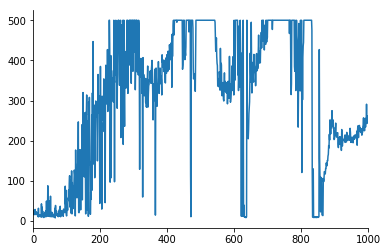

In [5]:
from src.rl.NeuralQAgent import NeuralQAgent

agent = NeuralQAgent(4, env.action_space.n, alpha=0.001, gamma=0.95, epsilon=1.0)
rewards = run_experiment(env, agent, 0.995, 1000)
sns.tsplot(rewards)
sns.despine()

Mean neural agent reward:  251.555


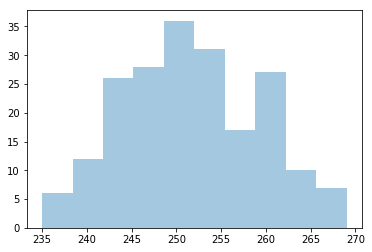

In [6]:
dist = [run_episode(env, agent) for _ in range(200)]
sns.distplot(dist, kde=False)
print("Mean neural agent reward: ", np.mean(dist))

In [13]:
env = gym.make('CartPole-v1')
run_episode(env, agent, render=True)

241.0